# Pengumpulan data

In [3]:
import pandas as pd #adalah pernyataan di Python yang mengimpor pustaka atau modul 
#bernama "pandas" dan memberikannya alias "pd"

data = pd.read_csv('R02_rice_field.csv')
#membaca data dari file CSV ('R02_rice_field.csv') ke dalam variabel data 
#menggunakan fungsi pd.read_csv dari pustaka pandas. 
data #Menampilkan datanya 

,Production (X),Harvest Area (Y)
0,1329536.00,323589.00
1,1299699.00,329041.00
2,1382905.00,339253.00
3,1419128.00,348223.00
4,1368074.00,337561.00
...,...,...
219,3831923.00,390799.00
220,4090654.00,396559.00
221,2488641.91,511940.93
222,2164089.33,464103.42


# Preprocessing data

In [4]:
#Import pustaka train_test_split dari scikit-learn untuk membagi datase
from sklearn.model_selection import train_test_split

X = data['Production (X)'].values.reshape(-1,1)# Variabel "Production (X)" diambil dari kolom 'Production (X)' 
#dalam dataset dan diubah menjadi bentuk array satu dimensi (-1,1).
Y = data['Harvest Area (Y)'].values# Variabel "Harvest Area (Y)" diambil dari kolom 'Harvest Area (Y)' dalam dataset.

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = .2)
# Menggunakan train_test_split untuk membagi dataset menjadi data pelatihan dan data pengujian.
# test_size=0.2 menunjukkan bahwa 20% dari data akan digunakan sebagai data pengujian.

# Pembentukan Model

In [6]:
#Ini mengimpor kelas LinearRegression dari modul linear_model dalam pustaka scikit-learn.
#Kelas ini menyediakan fungsionalitas untuk membuat model regresi linear
from sklearn.linear_model import LinearRegression

model = LinearRegression() #Ini membuat objek model regresi linear dari kelas LinearRegression
model.fit(x_train, y_train)#x_train yang berisi fitur-fitur (variabel independen) dari data pelatihan 
#dan y_train yang berisi nilai target (variabel dependen) yang sesuai.


LinearRegression()

# Analisis Akurasi model

In [7]:
print(f'Akurasi Regresi: {model.score(x_train, y_train)}')
#digunakan untuk mencetak atau menampilkan nilai akurasi 
#dari model regresi linear pada data pelatihan.

Akurasi Regresi: 0.8555952411606265


# Pengujian Model

In [8]:
 #digunakan untuk membuat prediksi menggunakan model regresi linear pada data uji
predik = model.predict(x_test)#ni akan menghasilkan nilai prediksi yang sesuai dengan variabel target (y) 
#berdasarkan model regresi linear yang telah dilatih sebelumnya.
predik

array([501668.99729763, 141051.46715753, 340916.8044818 , 171681.49519888,
       458058.15445877, 529180.57000701, 431457.47944202, 309288.06704725,
       328951.79569131, 306578.01208917, 644118.29835009, 133445.10386374,
       168191.732738  , 401507.6815647 , 490152.66877294, 384274.98424714,
       424940.30870501, 703566.21827838, 721451.71923945, 401732.11443072,
       535005.14616501, 650732.32367119, 174221.63312067, 468512.5689489 ,
       391311.33676955, 151230.37812755, 937927.2411811 , 179774.00480929,
       405773.03005672, 624023.65860328, 140534.40980344, 148179.92707803,
       884958.5369826 , 316141.51240405, 353858.59830964, 149036.06914622,
       653831.85770142, 134852.53772838, 412227.06734145, 159039.2555517 ,
       158666.07502657, 709682.48222635, 168887.69943019, 429705.29196636,
       136889.15545709])

In [10]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(predik, y_test)
#MAE mengukur rata-rata dari nilai absolut dari selisih antara prediksi dan nilai sebenarnya. 
#Semakin rendah nilai MAE, semakin baik performa model.
mse = mean_squared_error(predik, y_test)
#MSE mengukur rata-rata dari kuadrat dari selisih antara prediksi dan nilai sebenarnya. 
#Nilai MSE yang lebih kecil menunjukkan model yang lebih baik.
rmse = np.sqrt(mse)#semakin rendah nilai RMSE, semakin baik performa model.

print(f'MAE model: {mae}')
print(f'MSE model: {mse}')
print(f'RMSE model: {rmse}')
print(f'Akurasi model: {model.score(x_train, y_train)*100}%')
#metode ini mengukur sejauh mana model dapat memprediksi data pelatihan, 
#dan bukan data uji yang mungkin belum pernah dilihat sebelumnya
#koefisien determinasi (R-squared) yang dapat bernilai antara 0 dan 1. 
#Semakin tinggi nilainya, semakin baik performa model.

MAE model: 69347.41796559904
MSE model: 16702197896.974031
RMSE model: 129236.98347212392
Akurasi model: 85.55952411606265%


# Visualisasi model

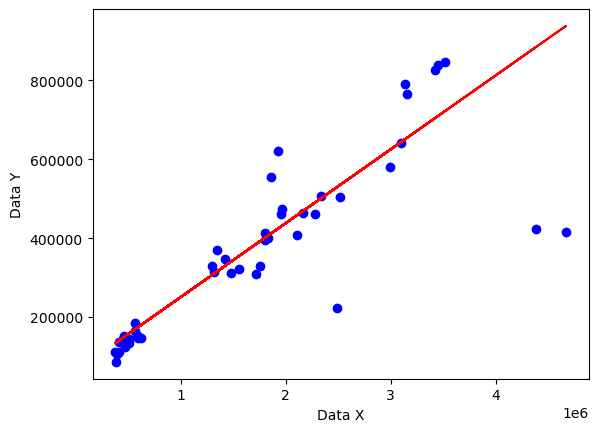

In [12]:
# Visualisasi Data
import matplotlib.pyplot as plt

plt.scatter(x_test, y_test, c='blue')
# Ini membuat scatter plot dari data uji. x_test adalah sumbu x, y_test adalah sumbu y, 
#dan warna titik-titik pada plot diatur menjadi biru 
plt.plot(x_test, predik, c='red')
#Ini membuat garis plot merah yang mewakili prediksi model regresi linear. x_test adalah sumbu x, 
#dan predik adalah prediksi model pada data uji. Warna garis diatur menjadi mera
plt.xlabel('Data X')#Ini memberi label sumbu x pada plot dengan teks 'Data X'.
plt.ylabel('Data Y')# Ini memberi label sumbu y pada plot dengan teks 'Data Y'.
plt.show()# Ini menampilkan plot.